In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [13]:
data = pd.read_csv("OneDrive/Desktop/DL COdes/3 MNIST/mnist_784_csv.csv")
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [19]:
X = data.drop(columns=['class']).values
Y = data['class'].values

In [21]:
X.shape

(70000, 784)

In [23]:
Y.shape

(70000, 10)

In [25]:
Y = to_categorical(Y,num_classes=10)

In [27]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2)

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(56000, 784)
(56000, 10)
(14000, 784)
(14000, 10)


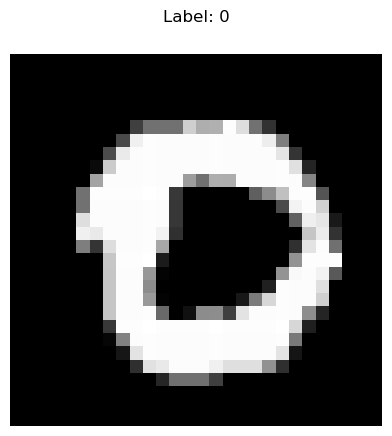

In [61]:
sample_image = x_train[5].reshape(28, 28)

# if y_test.ndim > 1:  # Check if y_test is one-hot encoded
digit_label = np.argmax(y_train[5])  # Get the index of the maximum value
# else:
    # digit_label = y_test[0]  # If already a single integer label

# Display the image
plt.matshow(sample_image, cmap='gray')
plt.title(f"Label: {digit_label}")  # Show the digit label
plt.axis('off')
plt.show()


<Figure size 400x2000 with 0 Axes>

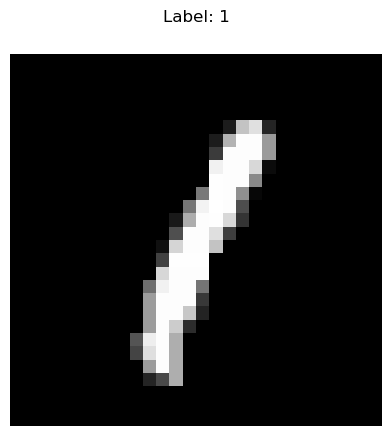

<Figure size 400x2000 with 0 Axes>

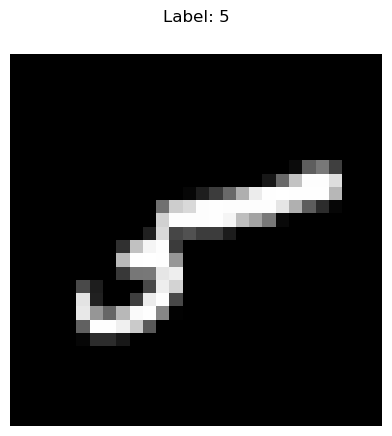

<Figure size 400x2000 with 0 Axes>

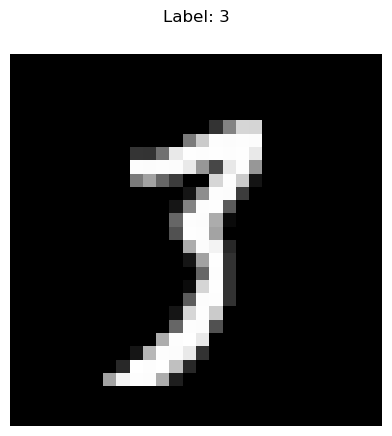

<Figure size 400x2000 with 0 Axes>

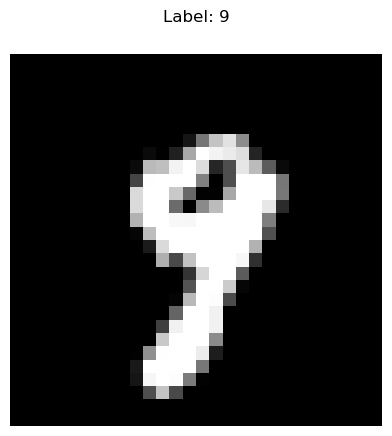

<Figure size 400x2000 with 0 Axes>

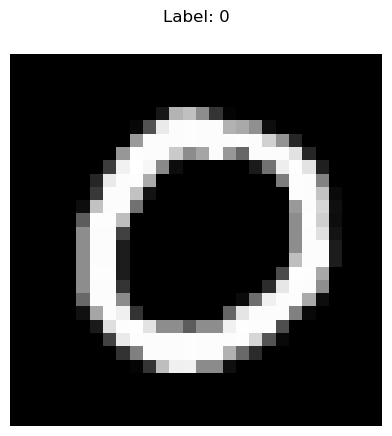

<Figure size 400x2000 with 0 Axes>

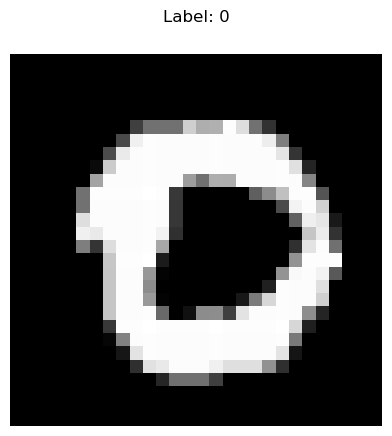

<Figure size 400x2000 with 0 Axes>

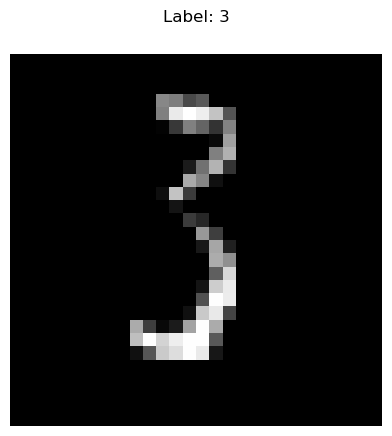

<Figure size 400x2000 with 0 Axes>

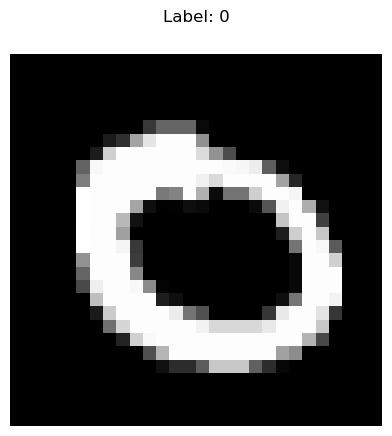

<Figure size 400x2000 with 0 Axes>

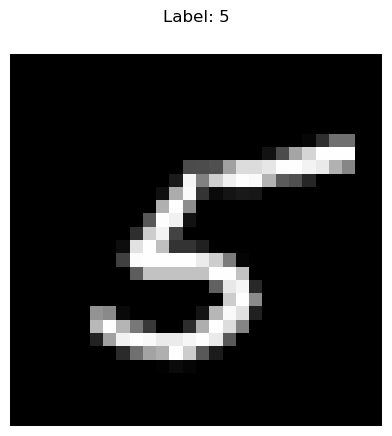

<Figure size 400x2000 with 0 Axes>

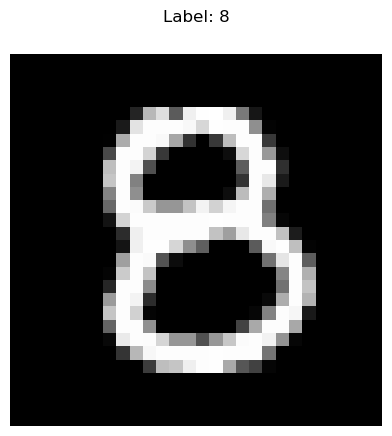

In [67]:
for i in range(10):
    plt.figure(figsize=(4,20))
    sample_image = x_train[i].reshape(28, 28)
    digit_label = np.argmax(y_train[i])  # Get the index of the maximum value
    plt.matshow(sample_image, cmap='gray')
    plt.title(f"Label: {digit_label}")  # Show the digit label
    plt.axis('off')
plt.show()

In [69]:
model = Sequential([Flatten(input_shape=(784,)),
                    Dense(128,activation='relu'),
                    Dense(64,activation='relu'),
                    Dense(10,activation='softmax')
                   ])

C:\Users\payal\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [73]:
history = model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7967 - loss: 5.2005 - val_accuracy: 0.9021 - val_loss: 0.4579
Epoch 2/5
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9206 - loss: 0.3395 - val_accuracy: 0.9315 - val_loss: 0.3116
Epoch 3/5
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9404 - loss: 0.2193 - val_accuracy: 0.9381 - val_loss: 0.2489
Epoch 4/5
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9529 - loss: 0.1758 - val_accuracy: 0.9399 - val_loss: 0.2265
Epoch 5/5
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9580 - loss: 0.1462 - val_accuracy: 0.9563 - val_loss: 0.1676


In [75]:
test_loss , test_acc = model.evaluate(x_test,y_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.9595 - loss: 0.1568


In [77]:
print(test_loss)
print(test_acc)

0.14990513026714325
0.960357129573822


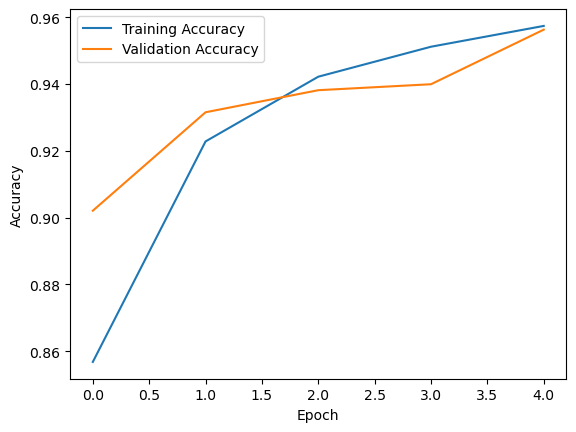

In [85]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

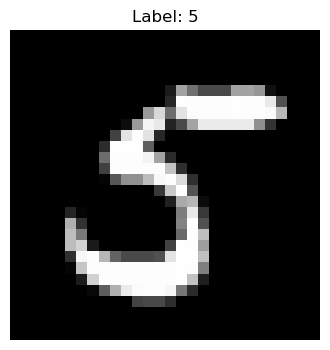

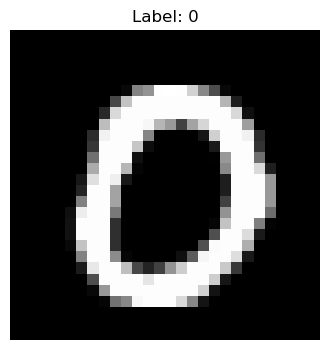

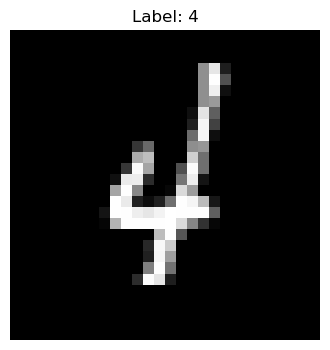

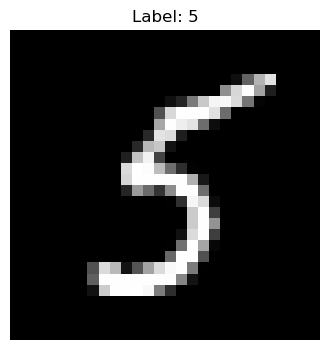

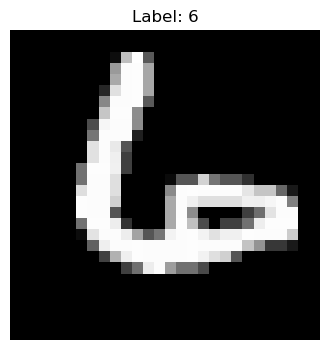

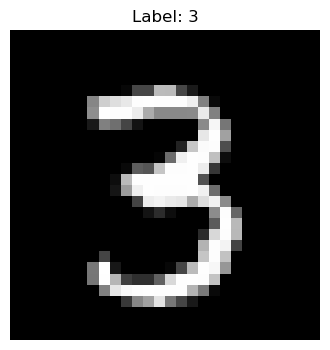

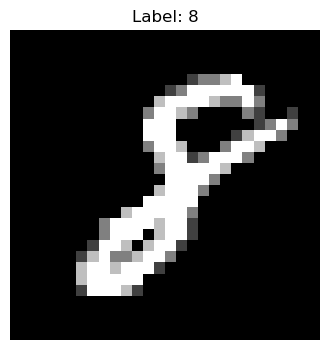

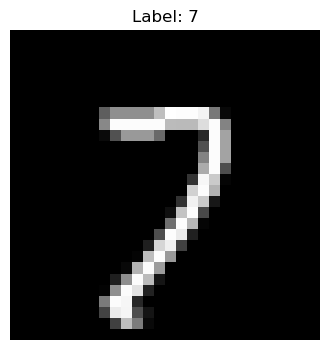

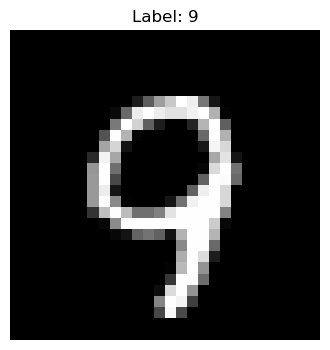

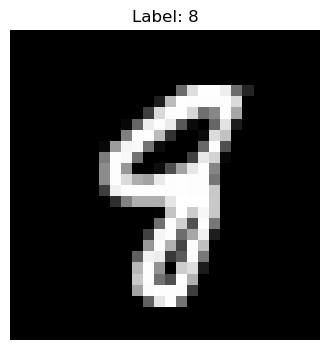

In [95]:
for i in range(10):
    plt.figure(figsize=(4,20))
    sample_image = x_test[i].reshape(28, 28)
    digit_label = np.argmax(y_test[i])  # Get the index of the maximum value
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Label: {digit_label}")  # Show the digit label
    plt.axis('off')
plt.show()